In [4]:
# Review of parameter tuning using cross_val_score
#Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read in Iris data
iris = load_iris()

# create X(feature) and y(response)
X = iris.data
y = iris.target

In [8]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [9]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.966666666667


In [10]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


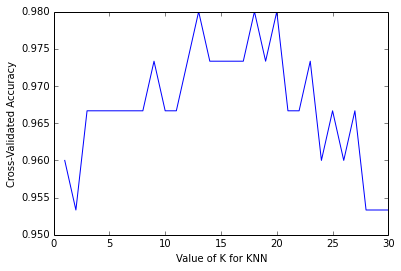

In [11]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [12]:
# More efficient parameter tuning using GridSearchCV
# Allows you to define a grid of parameters that will be searched using K-fold cross-validation
from sklearn.grid_search import GridSearchCV

In [14]:
# define parameter vales that need to be searched
k_range = range(1,31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [15]:
# create the parameter grid: map the parameter names to the values that need to be searched
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [16]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid,cv=10, scoring='accuracy')

In [17]:
# fit the grid with data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [19]:
# view the complete result
print grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1}, mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8}, mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11}, mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12}, mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13}, mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14}, mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15}, mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16}, mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17}, mean: 0.98000, std: 0.

In [22]:
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [24]:
# create a list of grid_mean_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

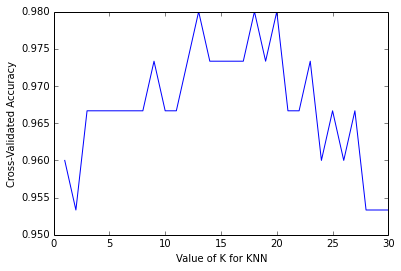

In [25]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [26]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')


In [27]:
# Searching multiple parameters simultaneously
# define the parameter values that should be searched
k_range = range(1,31)
weight_options = ['uniform', 'distance']

In [28]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [29]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=30, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [30]:
# view the complete results
print grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'}, mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'}, mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'}, mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'}, mean: 0.96667, std: 0.04472, params: {'n_neig

In [31]:
# examine the best model
print grid.best_score_
print grid.best_params_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [32]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([3, 5, 4, 2])

array([1])

In [33]:
grid.predict([3,5,4,2])

array([1])

In [34]:
# Reducing computational expense using RandomizedSearchCV
from sklearn.grid_search import RandomizedSearchCV

In [35]:
# specify parameter distribution rather that parameter grid
param_dist = dict(n_neighbors=k_range, weights = weight_options)

In [37]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist,cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [38]:
# examine best model
print rand.best_score_
print rand.best_params_

0.98
{'n_neighbors': 20, 'weights': 'uniform'}


In [39]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print best_scores

[0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.973]
